##  GRIP The Sparks Foundation

# Data Science & Business Analytics Task-1
## Prediction using Supervised ML
 - What will be the predicted score if a student studies for 9.25 hours per day ?

##### Author- Anushri Tandon

In [1]:
import pandas as pd
import numpy as np  

In [2]:
# Importing Data

data= pd.read_csv("https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv")

In [3]:
data.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [4]:
type(data)

pandas.core.frame.DataFrame

In [5]:
#checking for null values

data.isnull()          

,Hours,Scores
0,False,False
1,False,False
2,False,False
3,False,False
4,False,False
5,False,False
6,False,False
7,False,False
8,False,False
9,False,False


In [6]:
data.isnull().sum()        # we don't have any null value

Hours     0
Scores    0
dtype: int64

In [7]:
#We can see the summary of our Dataframe by .info function 

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [8]:
import matplotlib.pyplot as plt
%matplotlib inline

Text(0, 0.5, 'Scores')

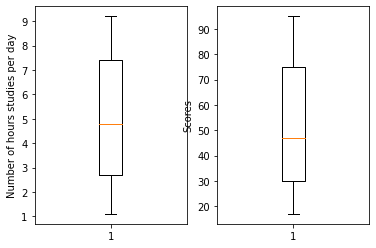

In [9]:
# Let's check for outliers with the help of boxplot

plt.subplot(1,2,1)
plt.boxplot(data['Hours'],)
plt.ylabel('Number of hours studies per day')

plt.subplot(1,2,2)
plt.boxplot(data['Scores'])
plt.ylabel("Scores")

#### We can see in the above boxplots that there is no outlier in our data set

Text(0.5, 1.0, 'Hours V/S Scores')

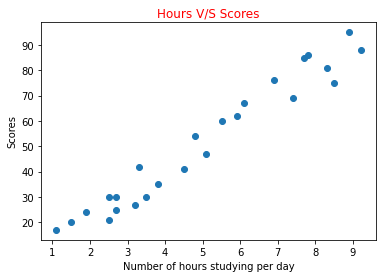

In [10]:
# Let's get the overview of relationship between Number of Hours Study and Scores

plt.scatter(data['Hours'],data['Scores'])

plt.xlabel("Number of hours studying per day")
plt.ylabel("Scores")
plt.title("Hours V/S Scores", color='r')

In [11]:
x_data = data['Hours']
y_data = data['Scores']

In [12]:
type(x_data)

pandas.core.series.Series

#### Note that the Data of independent variables (x_data in our case) must be in 2D array in order to fit the model , so we need to convert this data series into 2D array

In [13]:
x_data.values       # .values function returns Series as ndarray

array([2.5, 5.1, 3.2, 8.5, 3.5, 1.5, 9.2, 5.5, 8.3, 2.7, 7.7, 5.9, 4.5,
       3.3, 1.1, 8.9, 2.5, 1.9, 6.1, 7.4, 2.7, 4.8, 3.8, 6.9, 7.8])

In [14]:
x= x_data.values.reshape(25,1)
y= y_data.values

In [15]:
x

array([[2.5],
       [5.1],
       [3.2],
       [8.5],
       [3.5],
       [1.5],
       [9.2],
       [5.5],
       [8.3],
       [2.7],
       [7.7],
       [5.9],
       [4.5],
       [3.3],
       [1.1],
       [8.9],
       [2.5],
       [1.9],
       [6.1],
       [7.4],
       [2.7],
       [4.8],
       [3.8],
       [6.9],
       [7.8]])

In [16]:
y

array([21, 47, 27, 75, 30, 20, 88, 60, 81, 25, 85, 62, 41, 42, 17, 95, 30,
       24, 67, 69, 30, 54, 35, 76, 86], dtype=int64)

In [17]:
print(type(x))
print(type(y))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [18]:
print(x.shape)
print(y.shape)

(25, 1)
(25,)


#### Splitting our Data

In [19]:
# Now we need to split our data into training and splitting data

from sklearn.model_selection import train_test_split

In [20]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.3 ,random_state = 10)

In [21]:
len(x_train)   # 70% is for trainig data

17

In [22]:
len(x_test)    # 30% is given to testing 

8

In [23]:
x_train

array([[5.9],
       [3.8],
       [8.5],
       [6.9],
       [9.2],
       [6.1],
       [7.7],
       [4.8],
       [7.8],
       [8.3],
       [2.7],
       [2.5],
       [1.9],
       [2.5],
       [8.9],
       [3.5],
       [2.7]])

In [24]:
y_train

array([62, 35, 75, 76, 88, 67, 85, 54, 86, 81, 30, 30, 24, 21, 95, 30, 25],
      dtype=int64)

In [25]:
from sklearn import linear_model

In [26]:
model = linear_model.LinearRegression()

In [27]:
model.fit(x_train, y_train)

LinearRegression()

###### Note : Our model has trained

##### Now let's test our model with Test data

In [28]:
y_predicted = model.predict(x_test)

In [29]:
y_predicted

array([16.3158208 , 52.56027486, 34.43804783, 33.43125744, 46.51953252,
       75.71645385, 12.28865924, 56.58743642])

In [30]:
y_test.values

AttributeError: 'numpy.ndarray' object has no attribute 'values'

In [ ]:
# Comparing Actual and Predicted

df = pd.DataFrame({'Actual': y_test, 'Predicted': y_predicted})  

In [ ]:
df

##### Checking the accuracy (i.e. how good fit our model is) of our model by Mean Squared Error and Mean Absolute Error

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [ ]:
print("Mean Squared Error is : ", mean_squared_error(y_test, y_predicted))
print("Mean Absolute Error is : ", mean_absolute_error(y_test, y_predicted))

In [ ]:
#We can check the accuracy of our model by .score function as well, which gives nothing but the Coefficient of Determination(R^2)

R2= model.score(x_test, y_test)
print("Coefficent of Determination (R^2) is ", R2)

#### Fortunately Our Model if good fit

In [ ]:
## Intercept and Slope term of the best fitted line 

print("Intercept Term is : ", model.intercept_)
print("Coefficient/Slope term is : ", model.coef_)

In [ ]:
## Plotting our Best Fitted Line
plt.plot(x_test, y_predicted)

plt.title("Best Fitted Line", c='r')
plt.xlabel("Hours")
plt.ylabel("Scores")

In [ ]:
plt.scatter(x_test, y_test)
plt.plot(x_test, y_predicted)

plt.xlabel("Hours")
plt.ylabel("Scores")

##### Predicting the score if a student studies for 9.25 hrs/ day

In [ ]:
score= model.predict([[9.25]])      #independent variables must be in 2D arrays
print('If a student studies for 9.25hrs/day, then the Predicted Score is : ', score)